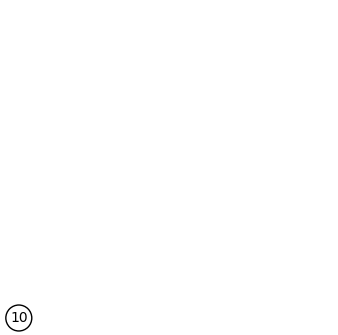

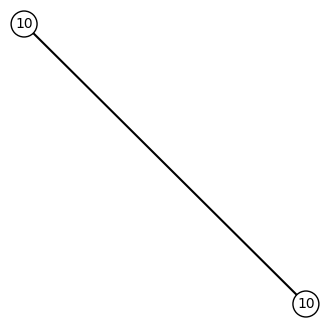

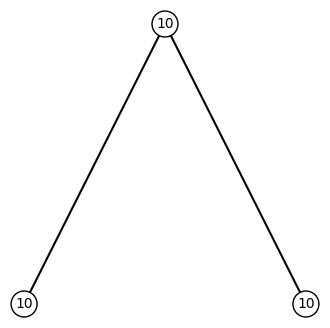

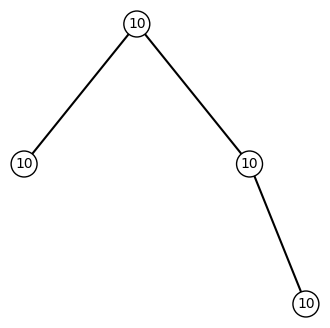

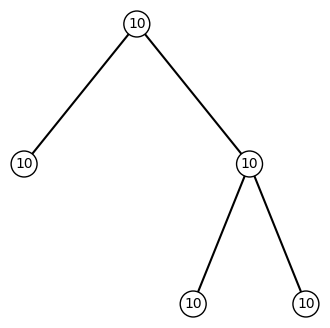

In [2]:
import tkinter as tk
from PIL import ImageTk, Image
import matplotlib.pyplot as plt
from tkinter import messagebox

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, data):
        self.root = self._insert(self.root, data)

    def _insert(self, root, data):
        if not root:
            return Node(data)
        elif data < root.data:
            root.left = self._insert(root.left, data)
        else:
            root.right = self._insert(root.right, data)

        balance_factor = self._get_balance_factor(root)

        if balance_factor > 1:
            if data < root.left.data:
                return self._rotate_right(root)
            else:
                root.left = self._rotate_left(root.left)
                return self._rotate_right(root)
        if balance_factor < -1:
            if data > root.right.data:
                return self._rotate_left(root)
            else:
                root.right = self._rotate_right(root.right)
                return self._rotate_left(root)

        return root

    def _get_height(self, root):
        if not root:
            return 0
        return max(self._get_height(root.left), self._get_height(root.right)) + 1

    def _get_balance_factor(self, root):
        if not root:
            return 0
        return self._get_height(root.left) - self._get_height(root.right)

    def _rotate_left(self, z):
        y = z.right
        if not y:
            return z

        T2 = y.left

        y.left = z
        z.right = T2

        return y

    def _rotate_right(self, z):
        y = z.left
        if not y:
            return z

        T3 = y.right

        y.right = z
        z.left = T3

        return y

    def draw(self):
        self._draw_helper(self.root, 0, 0, 20)

    def _draw_helper(self, root, x, y, spacing):
        if not root:
            return

        left_x = x - spacing
        right_x = x + spacing

        plt.text(x, y, str(root.data), color="black", fontsize=10, weight="light", va="center", ha="center", bbox=dict(facecolor="white", edgecolor="black", boxstyle="circle"))

        if root.left:
            plt.plot([x, left_x], [y, y - 1], color='black')
            self._draw_helper(root.left, left_x, y - 1, spacing / 2)

        if root.right:
            plt.plot([x, right_x], [y, y - 1], color='black')
            self._draw_helper(root.right, right_x, y - 1, spacing / 2)

# CREACIÓN DE UNA VENTANA TKINTER
ventana = tk.Tk()
ventana.title("ÁRBOL AVL EN PYTHON")
ventana.geometry("550x600")

mensaje = tk.Label(ventana, text="INSERTA EL UN VALOR ENTERO EN ESTA PARTE:")
mensaje.pack()

entrada = tk.Entry(ventana)
entrada.pack()

imagen = Image.open("Grafica.png")
imagen = imagen.resize((550, 550))

imagen_tk = ImageTk.PhotoImage(imagen)

a = []

def mostrar():
    texto = entrada.get()
    if texto.isdigit(): 
        valor = int(texto)
        a.append(valor)
        avl_tree = AVLTree()
        numbers = a
        for number in numbers:
            avl_tree.insert(number)
        plt.figure(figsize=(4,4))
        avl_tree.draw()
        plt.axis('off')
        plt.savefig("Grafica.png")
        global imagen_tk
        nueva_imagen = Image.open("Grafica.png")#REMPLAZO DE LA IMAGEN
        nueva_imagen = nueva_imagen.resize((550, 550))#TAMAÑO DE LA IMAGEN
        imagen_tk = ImageTk.PhotoImage(nueva_imagen)
        etiqueta_imagen.config(image=imagen_tk)
        etiqueta_imagen.config(image=imagen_tk)
    else:
        messagebox.showerror("Error", "Por favor, ingrese un valor numérico.")
        entrada.delete(0, tk.END)

boton = tk.Button(ventana, text="INSERTAR", command=mostrar)
boton.pack()

etiqueta_imagen = tk.Label(ventana)
etiqueta_imagen.pack()

ventana.mainloop()